## Finding the Optimal Policy for Calculating Hausdorff Dimension with Deep Deterministic Policy Gradient

### Deep Deterministic Policy Gradient (DDPG)
- State: The grayscaled image. Perhaps as a numpy array.
- Action: RGB value 0 to 255. Consider normalizing from 0 to 1.
- Actor-Critic: Have an actor network that outputs an RGB value, and a critic network that evaluates the Hausdorff dimension for a given state and action. 
- Reward design: Design a system to provide reward for the predicted Hausdorff dimension vs. the expected.
- Exploration: Encourage exploration in the RGB action space.
- Training: Train DDPG agent via interactions with environment (State, Action, Reward, State').
- Fine-tune: Adjust hyperparameters such as learning rate or discount factor.
- Evaluation: Evaluate the policy on new data.

### Part One: Calculating Hausdorff Dimension

In [1]:
import numpy as np
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import math
import statistics

In [2]:
import hausdorff
from hausdorff import *

In [3]:
bw_file_0 = rgb_to_grayscale("mycelium.jpg",71)
h_0 = hausdorff_dimension(bw_file_0)
nzpixels_0 = find_nonzero_pixels(bw_file_0)

Hausdorff dimension: 1.5093877354553316


In [4]:
xs_0 = h_0[0]
ys_0 = h_0[1]
slopes_0 = h_0[2]
haus_0 = h_0[3]

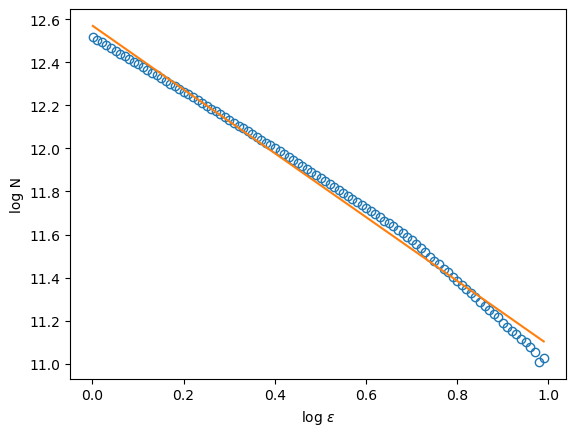

In [5]:
plot_regression(xs_0,ys_0,slopes_0)

In [6]:
bw_file_1 = rgb_to_grayscale("cactus.jpg",95)
h_1 = hausdorff_dimension(bw_file_1)
nzpixels_1 = find_nonzero_pixels(bw_file_1)

Hausdorff dimension: 1.805523694039939


In [7]:
xs_1 = h_1[0]
ys_1 = h_1[1]
slopes_1 = h_1[2]
haus_1 = h_1[3]

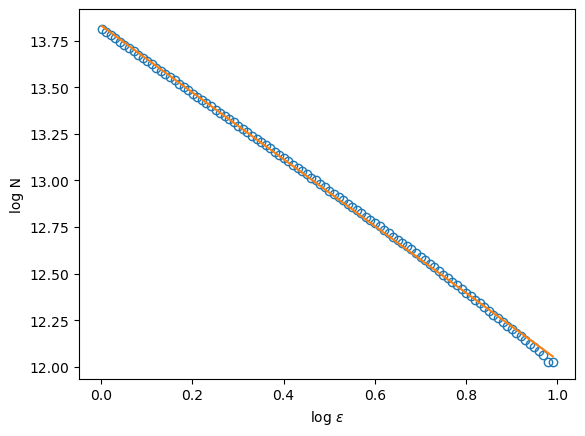

In [8]:
plot_regression(xs_1,ys_1,slopes_1)

In [9]:
bw_file_2 = rgb_to_grayscale("mississippi.png",105)
h_2 = hausdorff_dimension(bw_file_2)
nzpixels_2 = find_nonzero_pixels(bw_file_2)

Hausdorff dimension: 1.902652243002772


In [10]:
xs_2 = h_2[0]
ys_2 = h_2[1]
slopes_2 = h_2[2]
haus_2 = h_2[3]

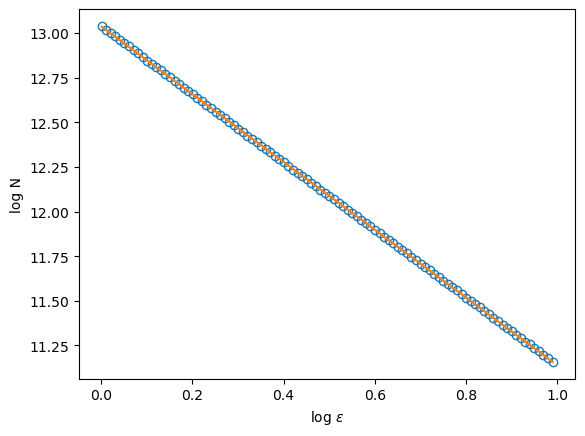

In [11]:
plot_regression(xs_2,ys_2,slopes_2)

In [12]:
bw_sierp = rgb_to_grayscale("sierpinski.png",22)
h_sierp = hausdorff_dimension(bw_sierp)

Hausdorff dimension: 1.5833354079237976


### Part Two: Reinforcement Learning for Hausdorff Dimension

To implement a DDPG for reinforcement learning, I can use keras-rl alongside OpenAI's gymnasium library, and I would have to learn to use the two libraries to reach the desired effect. I can register and set up the environment with gymnasium. Then, I can use keras-rl's DDPGAgent to actually implement the reinforcement learning algorithm.

Conceptually, it would work like this: DESCRIBE HERE

- State: The grayscaled image. Perhaps as a numpy array.
- Action: RGB value 0 to 255. Consider normalizing from 0 to 1.
- Actor-Critic: Have an actor network that outputs an RGB value, and a critic network that evaluates the Hausdorff dimension for a given state and action. 
- Reward design: Design a system to provide reward for the predicted Hausdorff dimension vs. the expected.
- Exploration: Encourage exploration in the RGB action space.
- Training: Train DDPG agent via interactions with environment (State, Action, Reward, State').
- Fine-tune: Adjust hyperparameters such as learning rate or discount factor.
- Evaluation: Evaluate the policy on new data.

In [ ]:
import gymnasium as gym
import rl

In [ ]:
problem = gym.register() # Register environment with gym

In [ ]:
env = gym.make(problem)
observation, info = env.reset(seed=42)

In [ ]:
ddpg_agent = rl.agents.ddpg.DDPGAgent()

In [ ]:
# Detect Hausdorff distance between two images?

In [ ]:
from skimage import metrics

In [ ]:
x_nzpixels_0 = nzpixels_0[0][:,0]
y_nzpixels_0 = nzpixels_0[0][:,1]

x_nzpixels_1 = nzpixels_1[0][:,0]
y_nzpixels_1 = nzpixels_1[0][:,1]

x_nzpixels_2 = nzpixels_2[0][:,0]
y_nzpixels_2 = nzpixels_2[0][:,1]

In [ ]:
coords_0 = np.zeros(nzpixels_0[1],dtype=bool)
coords_1 = np.zeros(nzpixels_1[1],dtype=bool)
coords_2 = np.zeros(nzpixels_2[1],dtype=bool)

In [ ]:
zip_0 = zip(x_nzpixels_0,y_nzpixels_0)
zip_1 = zip(x_nzpixels_1,y_nzpixels_1)
zip_2 = zip(x_nzpixels_2,y_nzpixels_2)

In [ ]:
for x,y in zip_0:
    coords_0[(x,y)]=True
    
for x,y in zip_1:
    coords_1[(x,y)]=True
    
for x,y in zip_2:
    coords_2[(x,y)]=True
print(coords_0)

In [ ]:
hd_0_to_1 = metrics.hausdorff_distance(coords_0, coords_1)
hdpoint_0,hdpoint_1 = metrics.hausdorff_pair(coords_0,
                                            coords_1)

hd_1_to_2 = metrics.hausdorff_distance(coords_1,coords_2)
hdpoint_1,hdpoint_2 = metrics.hausdorff_pair(coords_1,
                                             coords_2)

hd_0_to_2 = metrics.hausdorff_distance(coords_0,coords_2)
hdpoint_0,hdpoint_2 = metrics.hausdorff_pair(coords_0,
                                             coords_2)

hdtest = metrics.hausdorff_distance(coords_0,coords_0)
hdtest0,hdtest1 = metrics.hausdorff_pair(coords_0,coords_0)

In [ ]:
print(hd_0_to_1)
print(hd_1_to_2)
print(hd_0_to_2)
print(hdtest)

In [ ]:
neg_coords_0=[]

for xx in coords_0:
    app = []
    for y in xx:
        app.append(y!=True)
    neg_coords_0.append(app)
        
neg_coords_0 = np.asarray(neg_coords_0)

In [ ]:
hd_neg = metrics.hausdorff_distance(coords_0,neg_coords_0)
hd_neg1,hd_neg2 = metrics.hausdorff_pair(coords_0,neg_coords_0)

In [ ]:
# Maybe do an MDP to find the ideal rgb value to separate for Hausdorff dimension?

